# TLT Augment example usecase

This notebook shows an example usecase of Augmenting an object detection dataset using `tlt-augment` in the Transfer Learning Toolkit.

0. [Set-up env variables](#head-0)
1. [Prepare the dataset](#head-1)
2. [Augment the dataset](#head-2)
3. [Visualize augmented results](#head-3)

## 0. Set up env variables <a class="anchor" id="head-0"></a>
This project sets up all the environment variables for the input dataset and the augmented output data.

*Note: Please make sure to remove any stray artifacts/files from the `$USER_EXPERIMENT_DIR` or `$DATA_DOWNLOAD_DIR` paths as mentioned below, that may have been generated from previous runs.

In [1]:
class_name = 'Orthosia_Gothica'
AUGMENT_DIR='/workspace/tlt-experiments/insect-thesis/augment'
RAW_DATA_DIR='/workspace/tlt-experiments/insect-thesis/data/kitti/'+class_name+'/raw_data'
OUTPUT_DIR='/workspace/tlt-experiments/insect-thesis/data/kitti/'+class_name+'/augmented'
SPECS_DIR='/workspace/tlt-experiments/insect-thesis/augment/specs'
%env AUGMENT_DIR=$AUGMENT_DIR
%env OUTPUT_DIR=$OUTPUT_DIR
%env SPECS_DIR=$SPECS_DIR

env: AUGMENT_DIR=/workspace/tlt-experiments/augment
env: OUTPUT_DIR=/workspace/tlt-experiments/datasets/augmented/Orthosia_Gothica
env: SPECS_DIR=/workspace/tlt-experiments/augment/specs


## 1. Verifying the dataset <a class="anchor" id="head-1"></a>

The data is expected to be as follow:
* training images in `$RAW_DATA_DIR/training/image`
* training labels in `$RAW_DATA_DIR/training/label`
* testing images in `$RAW_DATA_DIR/testing/image`

*Note: There are no labels for the testing images, therefore we use it just to visualize inferences for the trained model.*

In [2]:
# verify
import os

images_dir = os.path.join(RAW_DATA_DIR, 'training/images')
labels_dir = os.path.join(RAW_DATA_DIR, 'training/labels')
images_list  = os.listdir(images_dir)
labels_list = os.listdir(labels_dir)
num_training_images = len(images_list)
num_training_labels = len(labels_list)
print("Number of images in the trainval set. {}".format(num_training_images))
print("Number of labels in the trainval set. {}".format(num_training_labels))

Number of images in the trainval set. 1008
Number of labels in the trainval set. 1008


## Augment the dataset <a class="anchor" id="head-2"></a>
First we need to replicate the images 4 times, so that we get one folder for each direction of the rotations.

In [3]:
import shutil

for i in range(4):
    new_folder = os.path.join(AUGMENT_DIR,str(i))
    if os.path.exists(new_folder):
        shutil.rmtree(new_folder)
    os.mkdir(new_folder)
    
    new_folder_images = os.path.join(new_folder,"images")
    os.mkdir(new_folder_images)
    for image in images_list:
        new_image = image.replace('.', '_'+str(i)+'.')
        src = os.path.join(images_dir, image)
        dst = os.path.join(new_folder_images, new_image)
        shutil.copyfile(src, dst)
        
    new_folder_labels = os.path.join(new_folder,"labels")
    os.mkdir(new_folder_labels)
    for label in labels_list:
        new_label = label.replace('.', '_'+str(i)+'.')
        src = os.path.join(labels_dir, label)
        dst = os.path.join(new_folder_labels, new_label)
        shutil.copyfile(src, dst)

In [4]:
for i in range(4):
    print("======================================================")
    cmd = "cat "+SPECS_DIR+"/spec"+str(i)+".txt"
    out = os.popen(cmd).read()
    print(out)
#    !cat $SPECS_DIR/spec'$i'.txt

# Spec file for tlt-augment.
spatial_config{
}
dataset_config{
    image_path: "images"
    label_path: "labels"
}
color_config{
}
output_image_width: 400
output_image_height: 400
output_image_channel: 3
image_extension: ".png"
# Spec file for tlt-augment.
spatial_config{
  rotation_config{
    angle: 90
    units: "degrees"
  }
  translation_config{
    translate_x: 250
    translate_y: -100
  }
}
dataset_config{
    image_path: "images"
    label_path: "labels"
}
color_config{
}
output_image_width: 400
output_image_height: 400
output_image_channel: 3
image_extension: ".png"
# Spec file for tlt-augment.
spatial_config{
  rotation_config{
    angle: 180
    units: "degrees"
  }
}
dataset_config{
    image_path: "images"
    label_path: "labels"
}
color_config{
}
output_image_width: 400
output_image_height: 400
output_image_channel: 3
image_extension: ".png"
# Spec file for tlt-augment.
spatial_config{
  rotation_config{
    angle: 270
    units: "degrees"
  }
}
dataset_config{
    imag

In [8]:
for i in range(4):
    cmd = "augment -a "+SPECS_DIR+"/spec"+str(i)+".txt -o "+OUTPUT_DIR+" -d "+AUGMENT_DIR+"/"+str(i)+" -v"
    out = os.popen(cmd).read()
    print(out)

In [7]:
!augment -a $SPECS_DIR/spec0.txt \
         -o $OUTPUT_DIR \
         -d $AUGMENT_DIR/0

2021-03-26 00:03:39.205412: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 00:03:53,183 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec0.txt
2021-03-26 00:03:53,184 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/0
2021-03-26 00:03:53,184 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/datasets/augmented/Orthosia_Gothica 
2021-03-26 00:03:53.532889: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 00:03:53.750797: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 00:03:53.750925: I tensorflow/stream_executor/platform/default

In [7]:
!augment -a $SPECS_DIR/spec0.txt \
         -o $AUGMENT_DIR/1 \
         -d $AUGMENT_DIR/1

2021-03-26 13:51:48.314065: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 13:51:51,938 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec0.txt
2021-03-26 13:51:51,939 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/1
2021-03-26 13:51:51,939 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/augment/1 
2021-03-26 13:51:51.950527: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 13:51:52.004496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 13:51:52.004572: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

In [8]:
!augment -a $SPECS_DIR/spec1.txt \
         -o $OUTPUT_DIR \
         -d $AUGMENT_DIR/1

2021-03-26 13:54:23.493345: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 13:54:27,143 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec1.txt
2021-03-26 13:54:27,143 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/1
2021-03-26 13:54:27,144 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/datasets/augmented/Orthosia_Gothica 
2021-03-26 13:54:27.155325: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 13:54:27.212134: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 13:54:27.212197: I tensorflow/stream_executor/platform/default

In [10]:
!augment -a $SPECS_DIR/spec0.txt \
         -o $AUGMENT_DIR/2 \
         -d $AUGMENT_DIR/2

2021-03-26 14:03:41.346853: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 14:03:45,077 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec0.txt
2021-03-26 14:03:45,078 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/2
2021-03-26 14:03:45,078 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/augment/2 
2021-03-26 14:03:45.089491: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 14:03:45.139268: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 14:03:45.139313: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

In [11]:
!augment -a $SPECS_DIR/spec2.txt \
         -o $OUTPUT_DIR \
         -d $AUGMENT_DIR/2

2021-03-26 14:05:56.171043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 14:05:59,994 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec2.txt
2021-03-26 14:05:59,995 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/2
2021-03-26 14:05:59,995 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/datasets/augmented/Orthosia_Gothica 
2021-03-26 14:06:00.006657: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 14:06:00.058582: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 14:06:00.058650: I tensorflow/stream_executor/platform/default

In [12]:
!augment -a $SPECS_DIR/spec0.txt \
         -o $AUGMENT_DIR/3 \
         -d $AUGMENT_DIR/3

2021-03-26 14:07:39.289432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 14:07:42,854 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec0.txt
2021-03-26 14:07:42,855 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/3
2021-03-26 14:07:42,855 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/augment/3 
2021-03-26 14:07:42.866365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 14:07:42.914110: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 14:07:42.914172: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

In [13]:
!augment -a $SPECS_DIR/spec3.txt \
         -o $OUTPUT_DIR \
         -d $AUGMENT_DIR/3

2021-03-26 14:10:39.913235: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 14:10:43,535 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from /workspace/tlt-experiments/augment/specs/spec3.txt
2021-03-26 14:10:43,552 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/augment/3
2021-03-26 14:10:43,553 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/datasets/augmented/Orthosia_Gothica 
2021-03-26 14:10:43.568400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 14:10:43.616216: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1665] Found device 0 with properties: 
name: GeForce GTX 1660 SUPER major: 7 minor: 5 memoryClockRate(GHz): 1.83
pciBusID: 0000:01:00.0
2021-03-26 14:10:43.616266: I tensorflow/stream_executor/platform/default

In [14]:
for i in range(4):
    new_folder = os.path.join(AUGMENT_DIR,str(i))
    if os.path.exists(new_folder):
        shutil.rmtree(new_folder)

## Visualize augmented results <a class="anchor" id="head-3"></a>
Now that the dataset has been augmented, it is worthwhile to render the augmented images and labels.
The outputs of `tlt-augment` are generated in the following paths:
* images: `$OUTPUT_DIR/images`
* labels: `$OUTPUT_DIR/labels`

In [15]:
# Simple grid visualizer
%matplotlib inline
import matplotlib.pyplot as plt
import os
from math import ceil
valid_image_ext = ['.jpg', '.png', '.jpeg', '.ppm']

def visualize_images(image_dir, num_cols=4, num_images=10):
    output_path = os.path.join(os.environ['OUTPUT_DIR'], image_dir)
    num_rows = int(ceil(float(num_images) / float(num_cols)))
    f, axarr = plt.subplots(num_rows, num_cols, figsize=[80,30])
    f.tight_layout()
    a = [os.path.join(output_path, image) for image in os.listdir(output_path) 
         if os.path.splitext(image)[1].lower() in valid_image_ext]
    for idx, img_path in enumerate(a[:num_images]):
        col_id = idx % num_cols
        row_id = idx // num_cols
        img = plt.imread(img_path)
        axarr[row_id, col_id].imshow(img)

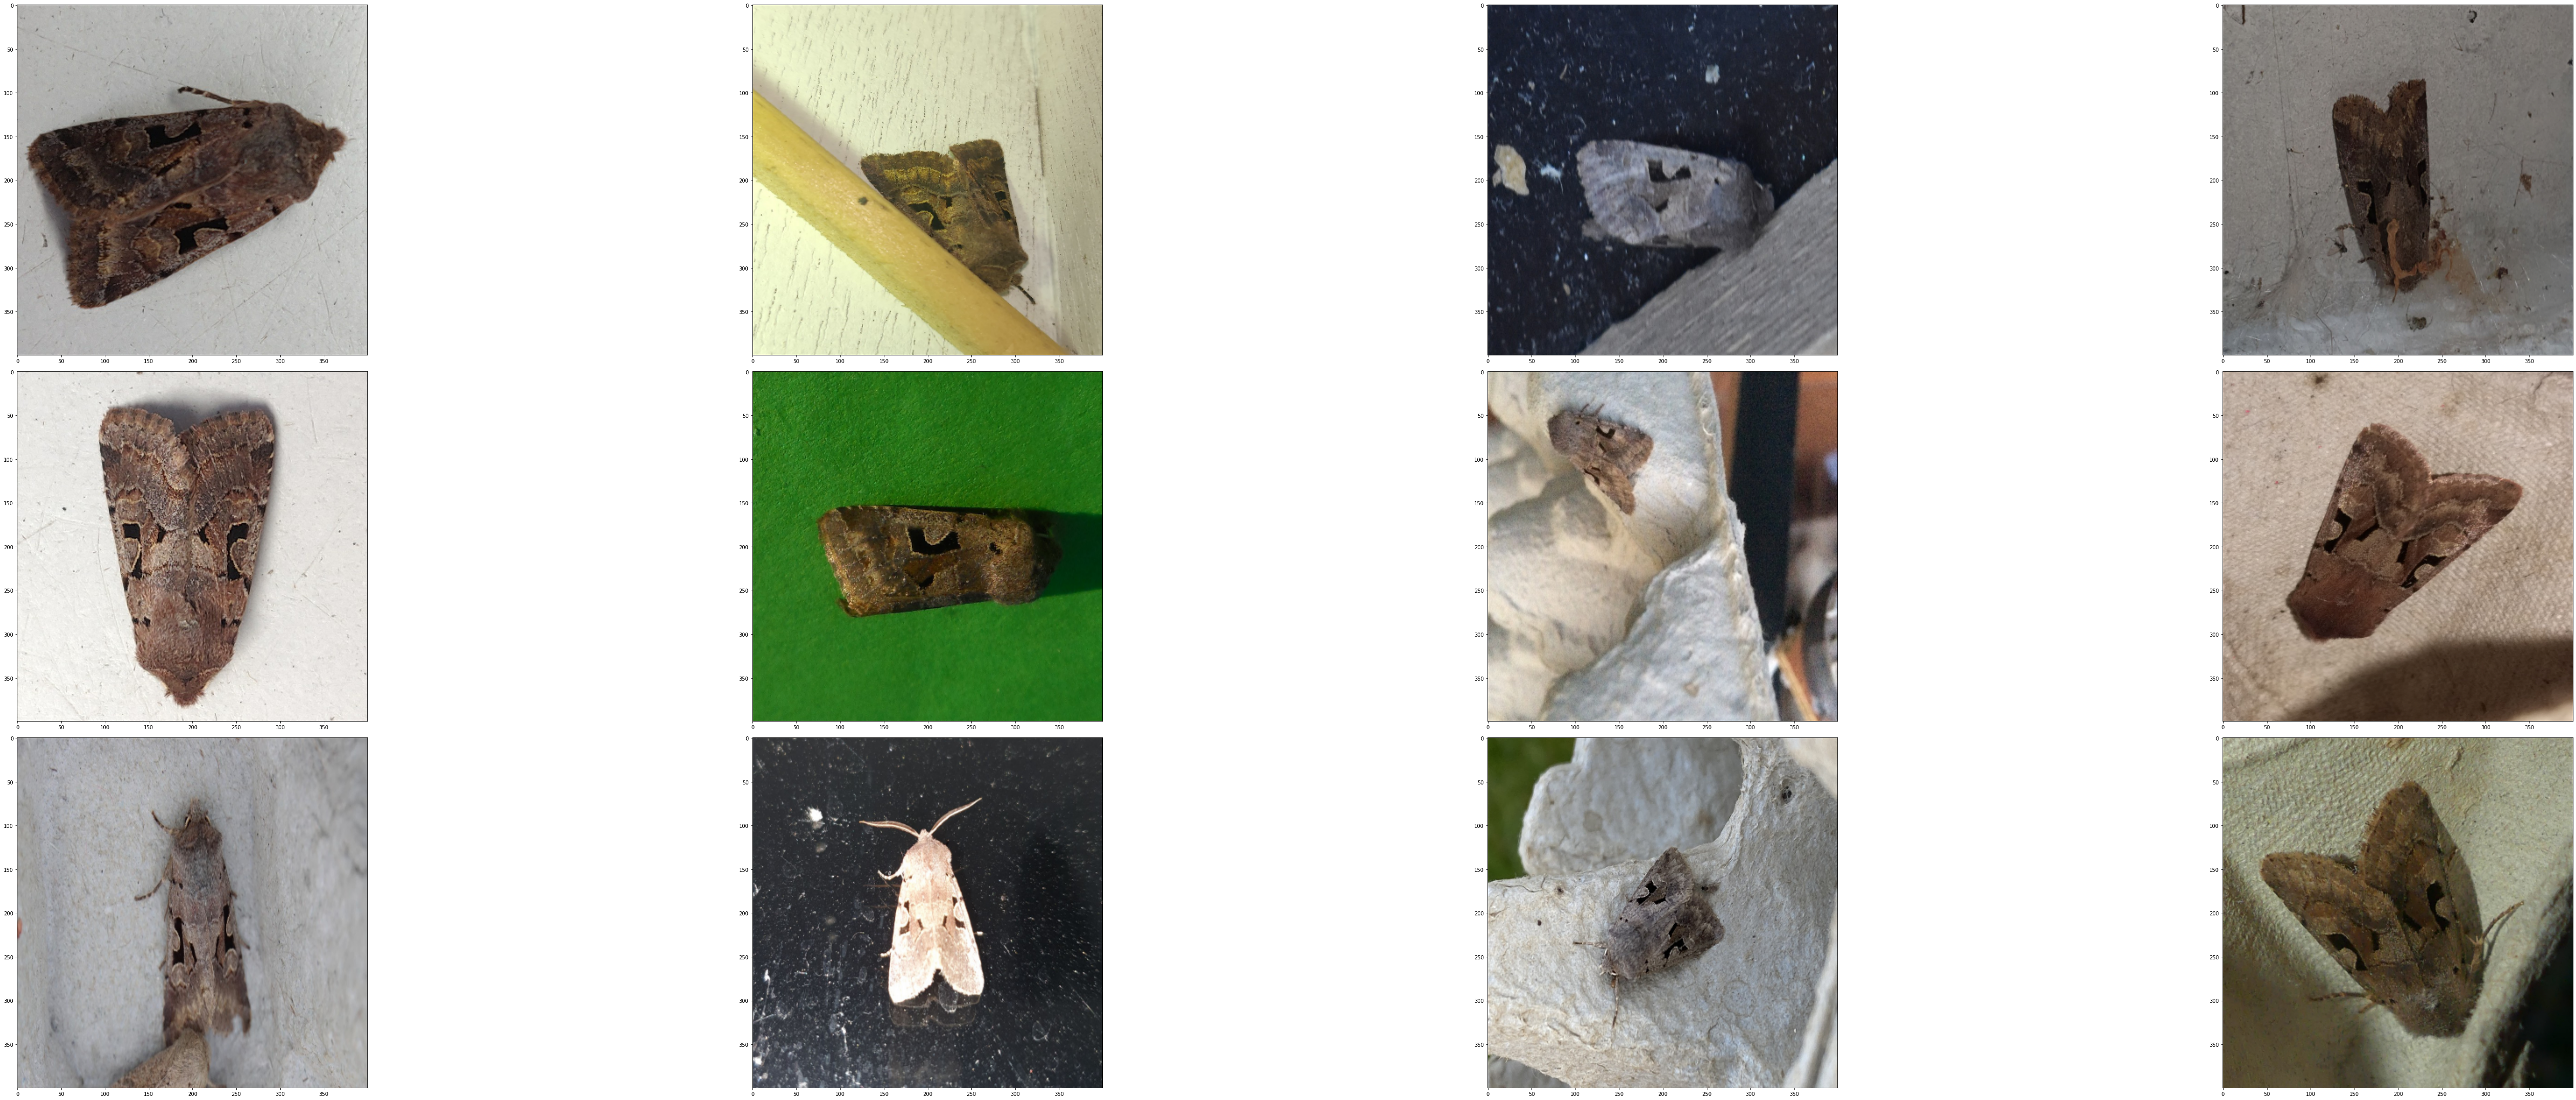

In [16]:
# Visualizing the first 12 images.
OUTPUT_PATH = 'images' # relative path from $USER_EXPERIMENT_DIR.
COLS = 4 # number of columns in the visualizer grid.
IMAGES = 12 # number of images to visualize.

visualize_images(OUTPUT_PATH, num_cols=COLS, num_images=IMAGES)